**Name:** David Paipa

**Name:** Faezeh Sadat Daei Nejad

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

$$x(t)= x_o e^{-kt}$$

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

**Answer:** it may correspond to a radiactive decay phoenomena, for example, where an initial number of particles Xo decays with time depending on the factor K. The dimension of of K is the inverse of time $$\frac{1}{s}$$

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. display f for x=1, t=10., k=1.

In [2]:
def deriv(x,t): # by definition
    global k
    
    return -k*x

k=1
print(deriv(1,10 ))

-1


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)


plot the result for dt=1 and for time going from 0 to t=5

Text(0.5, 0, 'X(t)')

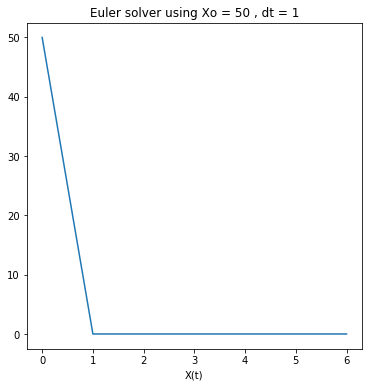

In [3]:
def F(x,t):#expliit euler method solver
    global dt  
    return x + dt*deriv(x,t)


xo  = 50 # arbitrary initial value
dt = 1 # time step

x_values = [] #storing the X values
t_values=  [] #storing the t values

x_values.append(xo) #first X stored is X(0)
t_values.append(0)  #first time stored is t=0

while(t_values[-1]<=5): # testing times from 0 to 5
    x_values.append( F(x_values[-1],t_values[-1]) ) #store the new x value updated by the solver using the las x and t values
    t_values.append(t_values[-1]+dt) # the time is updated adding dt to the last time stored 
    

plt.figure(figsize=(6,6))
plt.title("Euler solver using Xo = {} , dt = {}".format(xo,dt))
plt.plot(t_values,x_values)
plt.xlabel("Time")
plt.xlabel("X(t)")


Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

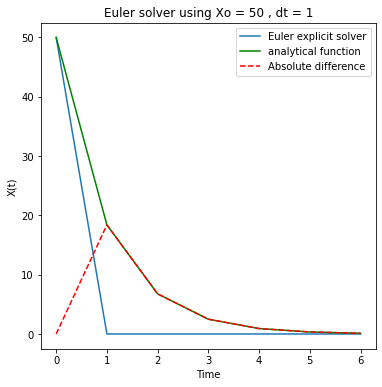

In [4]:
def analytical_func(x,t):
    global xo
    global k
    return xo*np.exp(-k*t)

x_ = analytical_func(1,np.array(t_values))

plt.figure(figsize=(6,6))
plt.title("Euler solver using Xo = {} , dt = {}".format(xo,dt))
plt.plot(t_values,x_values,label="Euler explicit solver")
plt.plot(t_values,x_,c="g",label="analytical function")
plt.plot(t_values,np.abs(x_values-x_),c="r",linestyle="--",label="Absolute difference")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()


**Comments:**

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6, 2. Cmment ?

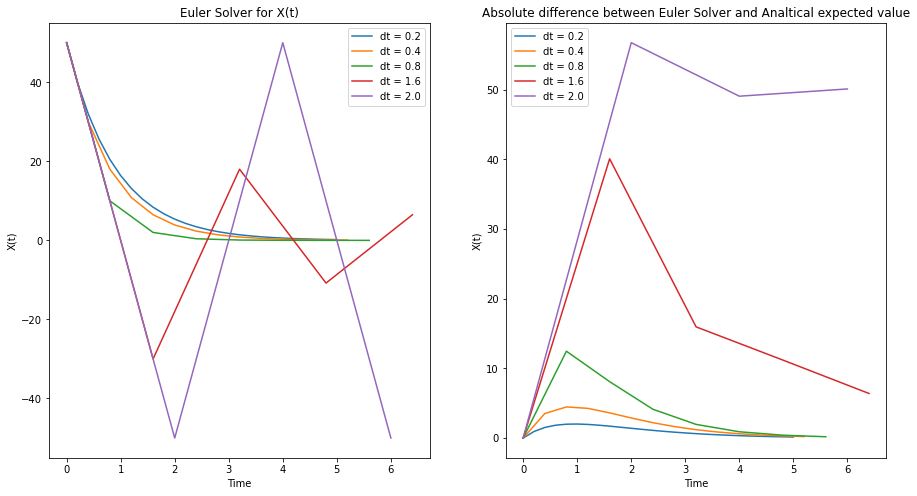

In [5]:
xo  = 50 # arbitrary initial value
dt_values = [0.2,0.4,0.8,1.6,2] # time step valus to check

DATA = {}

for dt in dt_values:

    x_values = [] #storing the X values
    t_values=  [] #storing the t values
    rx_values = []#storing the analytical function values
    err_values = []
    
    x_values.append(xo) #first X stored is X(0)
    t_values.append(0)  #first time stored is t=0
    rx_values.append(xo) #first expected value is xo
    err_values.append(0) #first error = xo-xo = 0



    while(t_values[-1]<=5): # testing times from 0 to 5
        x_values.append( F(x_values[-1],t_values[-1]) ) #store the new x value updated by the solver using the las x and t values
        t_values.append(t_values[-1]+dt) # the time is updated adding dt to the last time stored 
        rx_values.append(analytical_func(x_values[-1],t_values[-1])) # with the new t we obtain the analytical expected value
        err_values.append(np.abs(x_values[-1]-rx_values[-1])) # the rror is calculated
    
    
    DATA[dt] = [t_values,x_values,rx_values,err_values] # data is stored in a dictionary

#plotting
plt.figure(figsize=(15,8))

#value plot
plt.subplot(1,2,1)
plt.title("Euler Solver for X(t)")
for curve in DATA:
    
    dt = float(curve)
    tv = DATA[curve][0]
    xv = DATA[curve][1]
    plt.plot(tv,xv,label="dt = {}".format(dt))
        

plt.xlabel("Time")
plt.ylabel("X(t)")    
plt.legend()


#error plot
plt.subplot(1,2,2)
plt.title("Absolute difference between Euler Solver and Analtical expected value")
for curve in DATA:
    
    dt = float(curve)
    tv = DATA[curve][0]
    xv = DATA[curve][3]
    
    plt.plot(tv,xv,label="dt = {}".format(dt))
    
plt.xlabel("Time")
plt.ylabel("X(t)")  
plt.legend()
    


#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

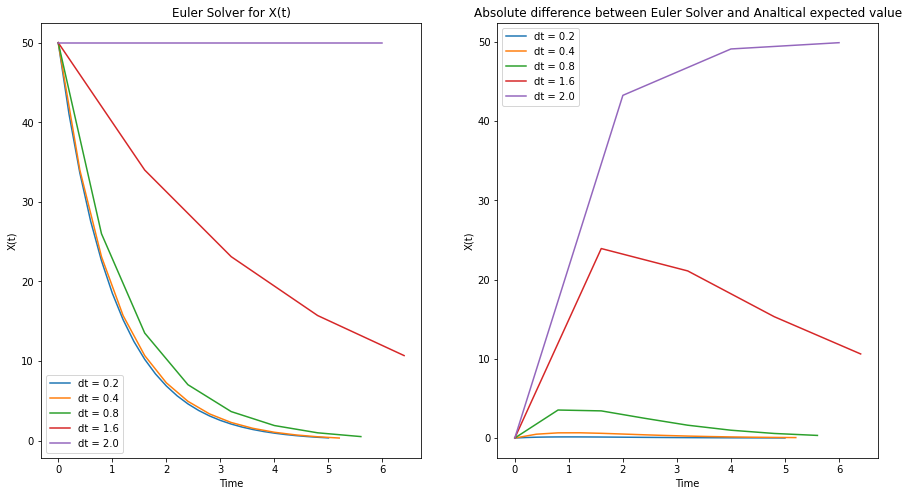

In [6]:
def F_modified(x,t):#modified euler method solver
    global dt  
    return x + dt*deriv(x + dt/2 *deriv(x,t) ,t+dt/2)

#COPY PASTE
xo  = 50 # arbitrary initial value
dt_values = [0.2,0.4,0.8,1.6,2] # time step valus to check

DATA = {}

for dt in dt_values:

    x_values = [] #storing the X values
    t_values=  [] #storing the t values
    rx_values = []#storing the analytical function values
    err_values = []
    
    x_values.append(xo) #first X stored is X(0)
    t_values.append(0)  #first time stored is t=0
    rx_values.append(xo) #first expected value is xo
    err_values.append(0) #first error = xo-xo = 0



    while(t_values[-1]<=5): # testing times from 0 to 5
        x_values.append( F_modified(x_values[-1],t_values[-1]) ) #store the new x value updated by the solver using the las x and t values
        t_values.append(t_values[-1]+dt) # the time is updated adding dt to the last time stored 
        rx_values.append(analytical_func(x_values[-1],t_values[-1])) # with the new t we obtain the analytical expected value
        err_values.append(np.abs(x_values[-1]-rx_values[-1])) # the rror is calculated
    
    
    DATA[dt] = [t_values,x_values,rx_values,err_values] # data is stored in a dictionary

#plotting
plt.figure(figsize=(15,8))

#value plot
plt.subplot(1,2,1)
plt.title("Euler Solver for X(t)")


for curve in DATA:
    
    dt = float(curve)
    tv = DATA[curve][0]
    xv = DATA[curve][1]
    
    plt.plot(tv,xv,label="dt = {}".format(dt))
    
plt.xlabel("Time")
plt.ylabel("X(t)")    
plt.legend()


#error plot
plt.subplot(1,2,2)
plt.title("Absolute difference between Euler Solver and Analtical expected value")
for curve in DATA:
    
    dt = float(curve)
    tv = DATA[curve][0]
    xv = DATA[curve][3]
    
    plt.plot(tv,xv,label="dt = {}".format(dt))
    
plt.xlabel("Time")
plt.ylabel("X(t)")  
plt.legend()
    



**Comments:**

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is : 




   $$\frac{dx}{dt} = V_x$$
   $$\frac{dy}{dt} = V_y$$
   $$\frac{dV_x}{dt} = - \frac{G M}{r^2} \frac{x}{r}$$
   $$\frac{dV_y}{dt} = - \frac{G M}{r^2} \frac{y}{r}$$

We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, aand that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [15]:
#CONSTANTS
G = 6.67430 * (10**(-11)) # Gravitational constant [m3 kg(-1) s(-1)]
Mt = 5.972 * (10**24) # Earth mass [kg]
m = 7.347 * (10 ** 22) # Moon mass [kg]
M = Mt*m/(Mt+m) # Reduced mass (earth-moon)
a = 384.0 * (10**6) # semi-major-axis [m]

w = np.sqrt((G*M/(a**3))) # orbital angular velocity [s(-1)]
T = 2*np.pi/(w) # orbital period [s]
dt = 0.01*T



#DERIVATIVES & EQS
def calc_r(x,y): # Radius value given x and y
    return np.sqrt((x**2) + (y**2))

def calc_energy(x,y,vx,vy,t):
    E_pot = (G*M*m)/calc_r(x,y) # gavitational potential energy
    E_kin = 0.5*m*(calc_r(vx,vy)**2) #absolute speed can be calculated with the same equation as radius  
    
    return E_pot + E_kin
    
def deriv_x(x,y,vx,vy,t): # vx is x change in time
    return vx

def deriv_y(x,y,vx,vy,t): # vy is y change in time
    return vy

def deriv_vx(x,y,vx,vy,t): # acceleration in x depends on constants and vx change in time
    global G
    global M,m,Mt
    return -((G * M)/(calc_r(x,y)**2)) * (x/calc_r(x,y))

def deriv_vy(x,y,vx,vy,t): # acceleration in y depends on constants and vy change in time
    global G
    global M,m,Mt
    return -((G * M)/(calc_r(x,y)**2)) * (y/calc_r(x,y))


#GRADIENT SOLVER

def gravderiv(x,y,vx,vy,t): #modified euler solver
    global dt
    #new values
    new_x = x + dt * deriv_x(x + (0.5*dt*deriv_x(x,y,vx,vy,t)) , y , vx , vy ,t+dt/2.0)
    new_y = y + dt * deriv_y(x , y + (0.5*dt*deriv_y(x,y,vx,vy,t)) , vx , vy , t+dt/2.0)
    new_vx = vx + dt * deriv_vx(x , y , vx+(0.5*dt*deriv_vx(x,y,vx,vy,t)) , vy , t+dt/2.0)
    new_vy = vy + dt * deriv_vy(x , y , vx , vy+(0.5*dt*deriv_vy(x,y,vx,vy,t)), t+dt/2.0)
    
    return (new_x, new_y , new_vx , new_vy , t+dt)
    


Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.

In [16]:
#initial conditions

#position
xo = a
yo = 0.0
#velocity
vxo = 0.0
vyo = a*w
#time
to = 0.0





def intgrate_moon_orbit(maxt,printing=False,funct=gravderiv):
    
    global xo, yo, vxo, vyo, to, G, M, m , a, w, T,dt #getting all constants
    
    n_it = int((maxt-to)/dt)
    print("dt = {:.2f}T implies a loop with {} iterations".format(dt/T,n_it))

    #storage arrays
    #initial value appended to the array
    x_vals = np.zeros(n_it)
    y_vals = np.zeros(n_it)
    vx_vals = np.zeros(n_it)
    vy_vals = np.zeros(n_it)
    t_vals = np.zeros(n_it)
    e_vals = np.zeros(n_it)
    
    #initial values
    x_vals[0] = xo
    y_vals[0] = yo
    vx_vals[0] = vxo
    vy_vals[0] = vyo
    t_vals[0] = to
    e_vals[0] = calc_energy(xo,yo,vxo,vyo,to)

    for i in range(1,n_it): #while the last value stored in time is less or equal to maxt
        
        #solve and get the new values
        (nx,ny,nvx,nvy,nt) = funct(x_vals[i-1],y_vals[i-1],vx_vals[i-1],vy_vals[i-1],t_vals[i-1]) 
        
        #append new values to the storage arrays
        x_vals[i]=nx
        y_vals[i]=ny
        vx_vals[i]=nvx
        vy_vals[i]=nvy
        t_vals[i]=nt
        e_vals[i]=calc_energy(nx,ny,nvx,nvy,nt)
        
        #progress display
        if(printing==True):
            prog = int(n_it/10)
            if((i) % prog == 0 and i>1):
                print("{:.2f}%".format(100*(i/n_it)))
    
    # store the arrays in a dictionary to export from the method
    DATA = {"x":x_vals , "y":y_vals, "vx":vx_vals , "vy":vy_vals , "t":t_vals, "e":e_vals}
    
    
    return DATA


Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

dt = 0.01T implies a loop with 10000 iterations


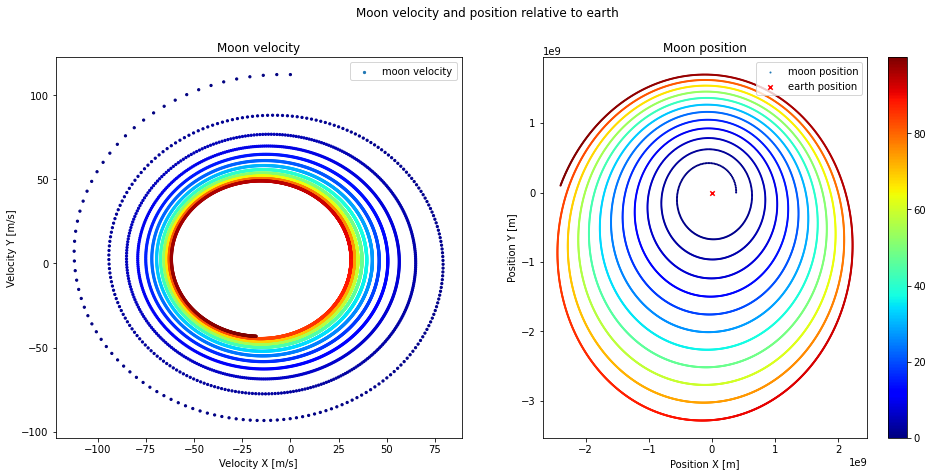

In [20]:
#creating data
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)

#first_n = 30000
#step=10

#plotting
plt.figure(figsize=(16,7))
plt.suptitle("Moon velocity and position relative to earth")
plt.subplot(1,2,1)
plt.scatter(orbit_DATA["vx"],orbit_DATA["vy"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon velocity")
plt.legend()
plt.xlabel("Velocity X [m/s]")
plt.ylabel("Velocity Y [m/s]")
plt.title("Moon velocity")
plt.subplot(1,2,2)
_=plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

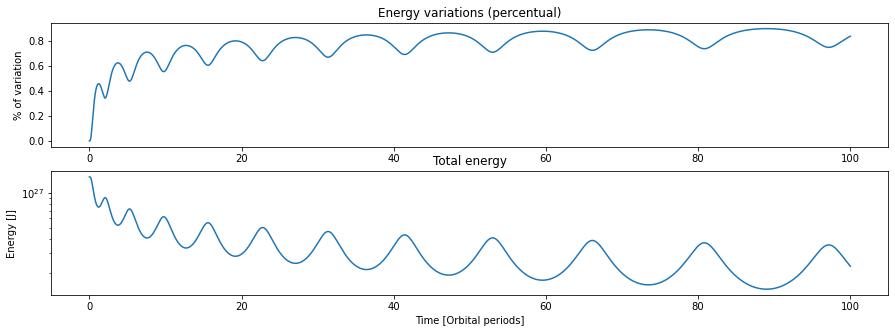

In [5]:
energies = orbit_DATA["e"]
Delta_E = [np.abs((x-energies[0])/energies[0]) for x in energies]
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title("Energy variations (percentual)")
plt.ylabel("% of variation")
plt.plot(orbit_DATA["t"]/T,Delta_E)
plt.subplot(2,1,2)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"])
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

dt = 0.01T implies a loop with 10000 iterations
dt = 0.10T implies a loop with 999 iterations
dt = 0.50T implies a loop with 199 iterations


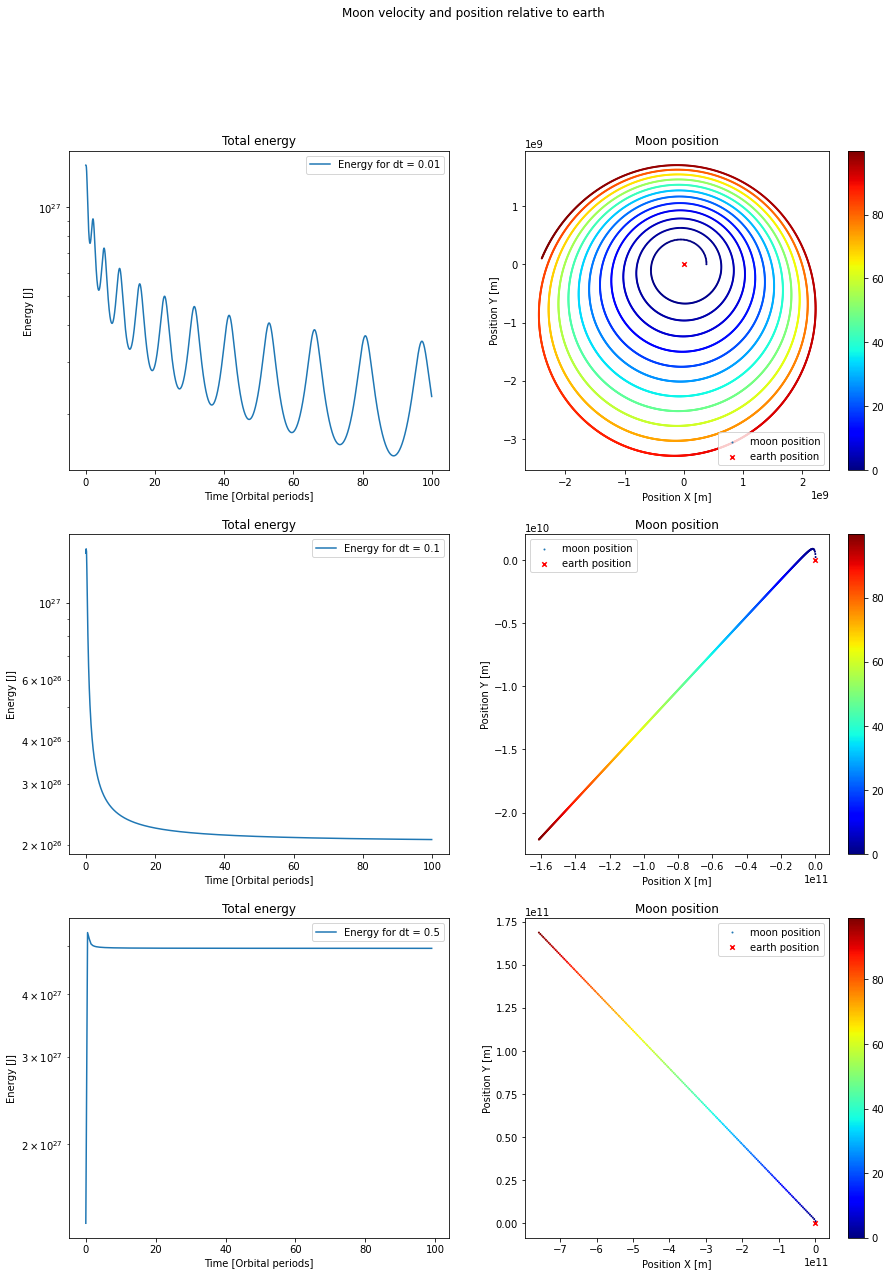

In [22]:
#creating data
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)
#plotting
plt.figure(figsize=(15,20))
plt.suptitle("Moon velocity and position relative to earth")
plt.subplot(3,2,1)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for dt = {}".format(dt/T))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,2)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()



#creating data
dt=0.1*T
orbit_DATA = intgrate_moon_orbit(100*T)

plt.subplot(3,2,3)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for dt = {}".format(dt/T))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,4)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()


#creating data
dt=0.5*T
orbit_DATA = intgrate_moon_orbit(100*T)
#plotting

plt.subplot(3,2,5)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for dt = {}".format(dt/T))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,6)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()

Conclusion : What time-step should you use ? 

#### Answer : 

smaller dt offers more accurate calculations, but using bigger dt's gives you the results faster since you use less iterations to get a certain point in the function.

How to control the quality of your solution  in your opinion?

#### Answer:

If an anlytical function is known, then the error can be a good hint on the quality of our solution. If not, finding a constant value preserved in the system (such as energy in this case) and trace its values. Other option might be creating a simple and smaller setup to check the performance of the algorithm.

Now, let's consider a more complex orbit. Start the same integration, but now the initial velocity has a small X component initially à t=0: Vx=e*V_y, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations


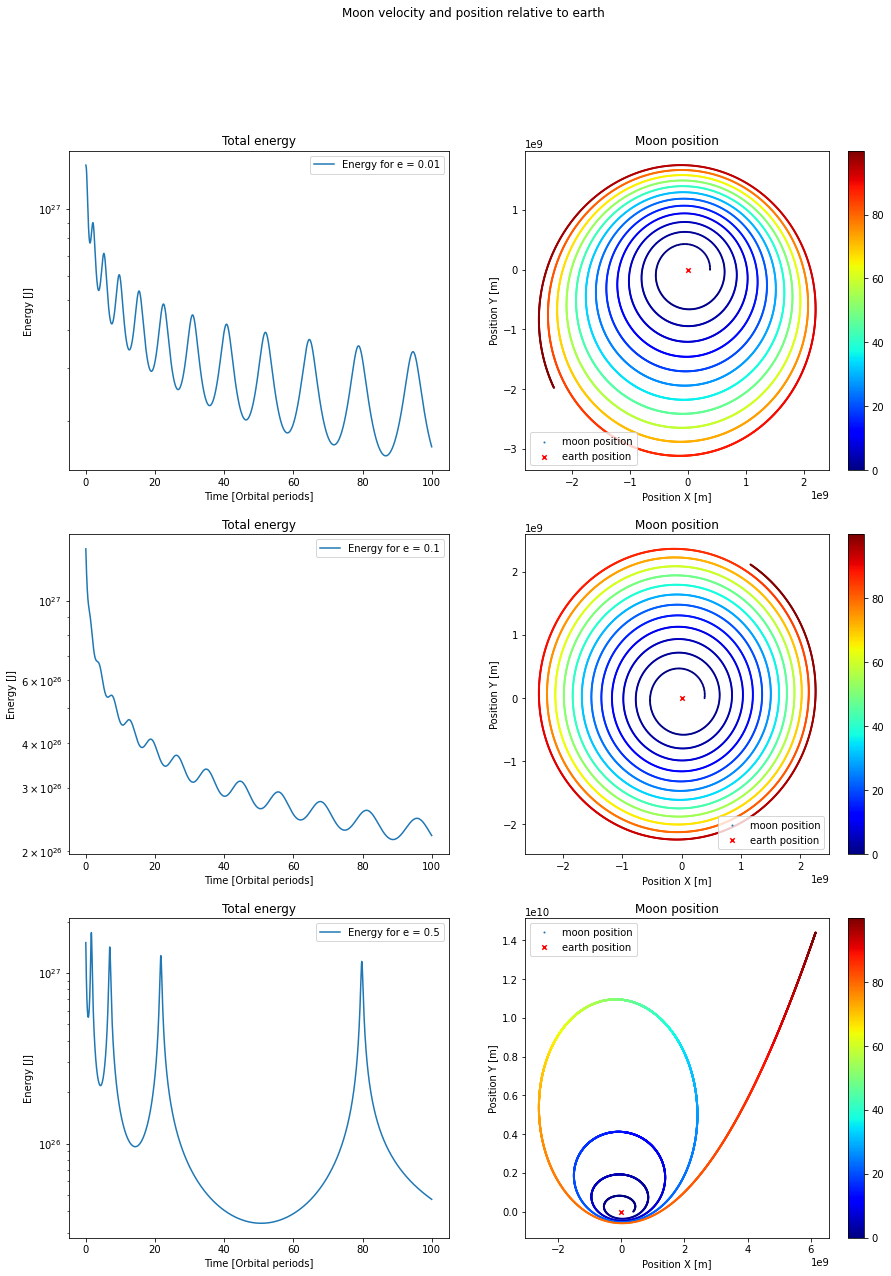

In [23]:

#creating data
e = 0.01
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)
#plotting
plt.figure(figsize=(15,20))
plt.suptitle("Moon velocity and position relative to earth")
plt.subplot(3,2,1)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,2)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()

#creating data
e = 0.1
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)
#plotting

plt.subplot(3,2,3)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,4)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()


#creating data
e = 0.5
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)
#plotting

plt.subplot(3,2,5)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,6)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=1,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()


Display energy variations for e=0.01 and then e=0.1. What do you see ?

dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations


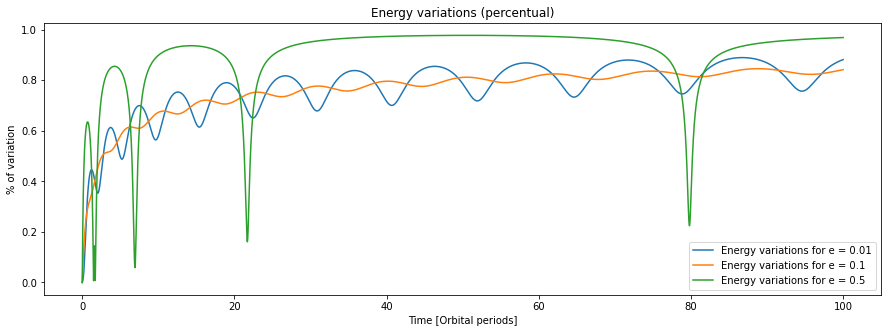

In [8]:
#gen data
e = 0.01
vxo = e*vyo
orbit_DATA = intgrate_moon_orbit(100*T) #integrate until T=100
energies = orbit_DATA["e"]
Delta_E = [np.abs((x-energies[0])/energies[0]) for x in energies]

#plot
plt.figure(figsize=(15,5))

plt.title("Energy variations (percentual)")
plt.ylabel("% of variation")
plt.plot(orbit_DATA["t"]/T,Delta_E,label="Energy variations for e = {}".format(e))
plt.legend()

#gen data
e = 0.1
vxo = e*vyo
orbit_DATA = intgrate_moon_orbit(100*T)
energies = orbit_DATA["e"]
Delta_E = [np.abs((x-energies[0])/energies[0]) for x in energies]
#plot

plt.plot(orbit_DATA["t"]/T,Delta_E,label="Energy variations for e = {}".format(e))



#gen data
e = 0.5
vxo = e*vyo
orbit_DATA = intgrate_moon_orbit(100*T)
energies = orbit_DATA["e"]
Delta_E = [np.abs((x-energies[0])/energies[0]) for x in energies]
#plot

plt.plot(orbit_DATA["t"]/T,Delta_E,label="Energy variations for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("% of variation")
plt.legend()

#### Observation:
Energy fluctuations are given in the critical points of the orbit i.e. periapsis and apoapsis that aere whe the moon is closer or further form earth, respectively. The variations on energy depend on the distance from the earth.

## 3 Energy conservative system 2 : going to 4th order

Reuse the function that computes the derive in case of planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [9]:
#RK4 GRADIENT SOLVER

def RK_gravderiv(x,y,vx,vy,t): #4th order Runge - Kutta solver
    global dt
    
    
    #new x values
    x_k1 = dt * deriv_x(x , y , vx , vy , t)
    x_k2 = dt * deriv_x(x + x_k1/2 , y , vx , vy , t + dt/2 )
    x_k3 = dt * deriv_x(x + x_k2/2 , y , vx , vy , t + dt/2 )
    x_k4 = dt * deriv_x(x + x_k3 , y , vx , vy , t + dt )
    new_x = x + 1/6*(x_k1 + 2*x_k2 + 2*x_k3 + x_k4)
    
    #new y values
    y_k1 = dt * deriv_y(x , y , vx , vy , t)
    y_k2 = dt * deriv_y(x  , y + y_k1/2 , vx , vy , t + dt/2 )
    y_k3 = dt * deriv_y(x  , y + y_k2/2 , vx , vy , t + dt/2 )
    y_k4 = dt * deriv_y(x  , y + y_k3 , vx , vy , t + dt )
    new_y = y + 1/6*(y_k1 + 2*y_k2 + 2*y_k3 + y_k4)
    
    #new vx values
    vx_k1 = dt * deriv_vx(x , y , vx , vy , t)
    vx_k2 = dt * deriv_vx(x  , y , vx + vx_k1/2 , vy , t + dt/2 )
    vx_k3 = dt * deriv_vx(x , y , vx + vx_k2/2, vy , t + dt/2 )
    vx_k4 = dt * deriv_vx(x , y , vx + vx_k3 , vy , t + dt )
    new_vx = vx + 1/6*(vx_k1 + 2*vx_k2 + 2*vx_k3 + vx_k4)
    
    #new vy values
    vy_k1 = dt * deriv_vy(x , y , vx , vy , t)
    vy_k2 = dt * deriv_vy(x  , y  , vx , vy + vy_k1/2 , t + dt/2 )
    vy_k3 = dt * deriv_vy(x  , y , vx , vy + vy_k2/2 , t + dt/2 )
    vy_k4 = dt * deriv_vy(x  , y , vx , vy + vy_k3 , t + dt )
    new_vy = vy + 1/6*(vy_k1 + 2*vy_k2 + 2*vy_k3 + vy_k4)

    return (new_x, new_y , new_vx , new_vy , t+dt)
    


Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations
dt = 0.01T implies a loop with 10000 iterations


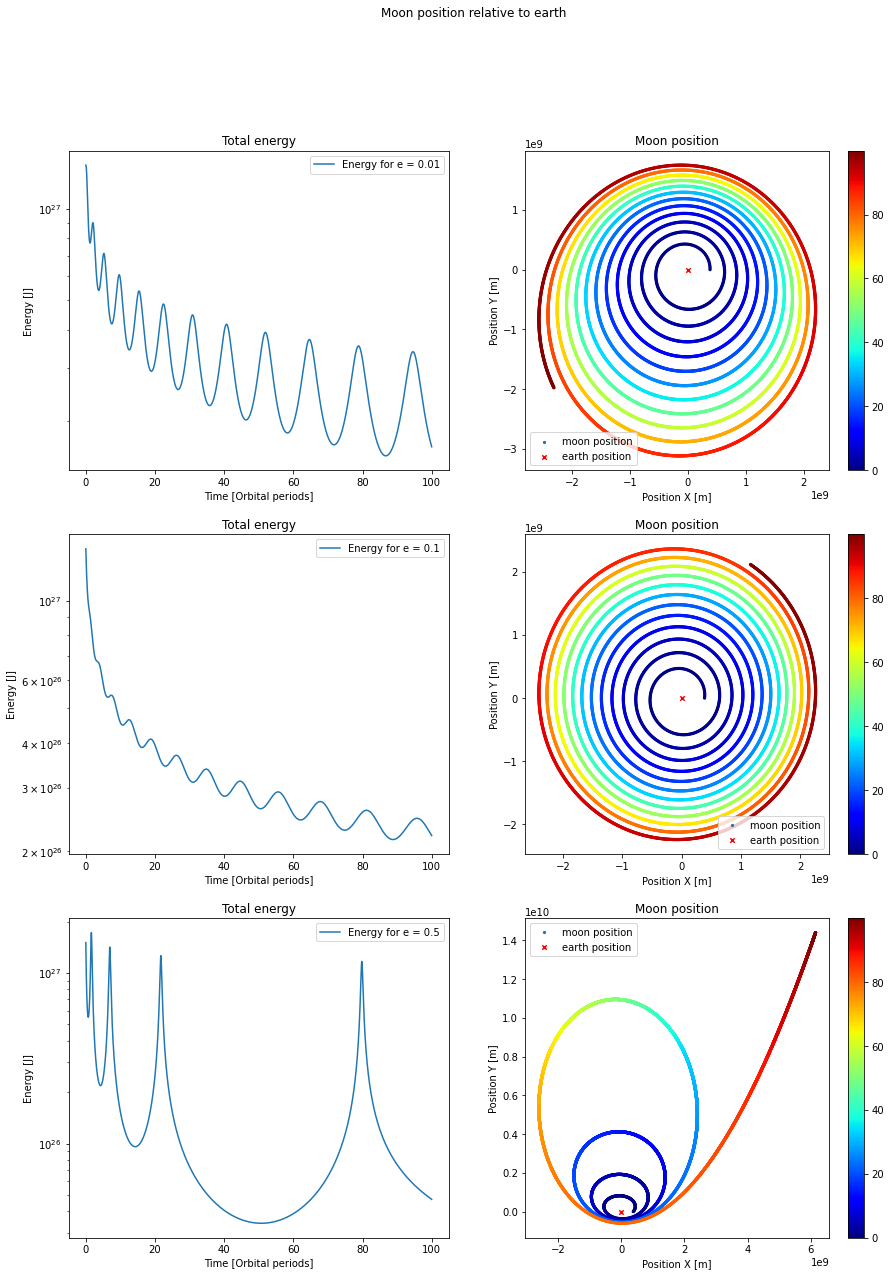

In [10]:

#creating data
e = 0.01
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T,funct=RK_gravderiv)
#plotting
plt.figure(figsize=(15,20))
plt.suptitle("Moon position relative to earth")

plt.subplot(3,2,1)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,2)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()

#creating data
e = 0.1
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T,funct=RK_gravderiv)
#plotting

plt.subplot(3,2,3)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,4)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()


#creating data
e = 0.5
vxo = e*vyo
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T,funct=RK_gravderiv)
#plotting

plt.subplot(3,2,5)
plt.title("Total energy")
plt.plot(orbit_DATA["t"]/T,orbit_DATA["e"],label="Energy for e = {}".format(e))
plt.xlabel("Time [Orbital periods]")
plt.ylabel("Energy [J]")
plt.yscale("log")
plt.legend()
plt.subplot(3,2,6)
_ = plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()


It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

dt = 0.01T implies a loop with 10000 iterations


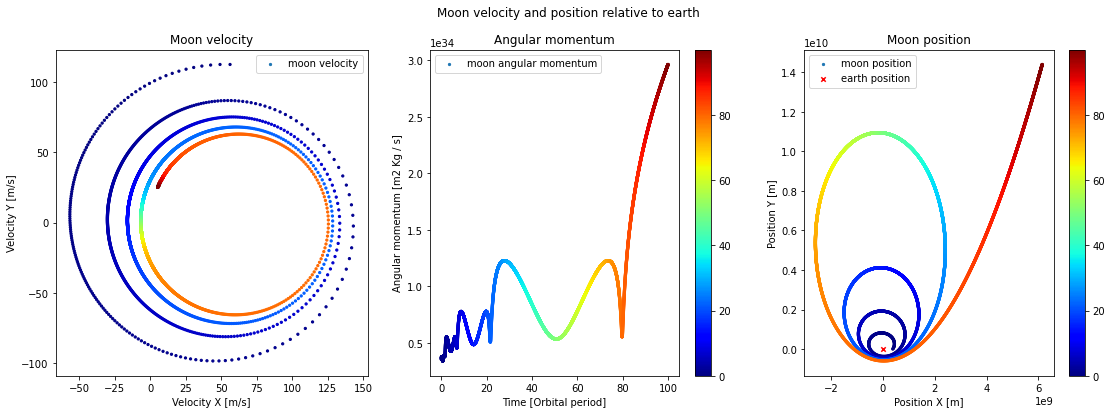

In [11]:
#def angular_momentum(x,y,vx,vy,t):
#    global m ,w 
#    I = m * calc_r(x,y)**2
#    L = I*w
#    return L


#creating data
dt=0.01*T
orbit_DATA = intgrate_moon_orbit(100*T)

Lm = calc_r(orbit_DATA["vx"],orbit_DATA["vy"]) * calc_r(orbit_DATA["x"],orbit_DATA["y"])*m

#first_n = 30000
#step=10

#plotting
plt.figure(figsize=(19,6))
plt.suptitle("Moon velocity and position relative to earth")
plt.subplot(1,3,1)
plt.scatter(orbit_DATA["vx"],orbit_DATA["vy"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon velocity")
plt.legend()
plt.xlabel("Velocity X [m/s]")
plt.ylabel("Velocity Y [m/s]")
plt.title("Moon velocity")
plt.subplot(1,3,2)
plt.scatter(orbit_DATA["t"]/T,Lm,c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon angular momentum")
##plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Time [Orbital period]")
plt.ylabel("Angular momentum [m2 Kg / s]")
plt.title("Angular momentum")
plt.colorbar(_)
plt.legend()
plt.subplot(1,3,3)
_=plt.scatter(orbit_DATA["x"],orbit_DATA["y"],c=orbit_DATA["t"]/T,cmap="jet",s=5,label="moon position")
plt.scatter([0],[0],c="r",s=20,marker="x",label="earth position")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.title("Moon position")
plt.colorbar(_)
plt.legend()

**COMMENT:** We couldn't find the error on the formulation that causes the orbits to be elliptical and spiral. Energy and nular momentum should be conserved in  perferct physical system, but in this cae we have that this value changes in time and seems to be dependent on the distance of the moon to the earth. The variations in energy and angular momentum were expected as a consequience of first order solvers and numerical precision of python, but even with this considerations, the result seems to be unaccurate.

## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particule with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention)

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

#### ANSWER:

$ m \ddot z  = F_g + F_s =  -mg - 6\pi \mu r V_z$

$\ddot z = \dot V_z$ 

$\dot z = V_z$ 

$ \dot V_z = -g - \frac{6\pi \mu r Vz}{m}$





##### Analytical solutions

After integration:

$$V_z(t) = -g \frac{m}{6 \pi \mu r} \left( 1-e^{-\frac{6 \pi \mu r t}{m}} \right) = -\frac{g}{K} \left( 1-e^{-Kt} \right)$$

$$ Z(t) =  -\frac{g}{K}\left( t+\frac{1}{K}e^{-Kt} -  \frac{1}{K}\right) $$

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

In [194]:
def Deriv_free_fall(U,t) : 
    global m
    global mu
    global r
    global g
    
    K = 6*np.pi*mu*r/m 
    
    #differential eqs
    Vz = U[1]
    dz = Vz
    dV = -g - K*Vz
    
    return np.array([dz,dV])


#RK4 SOLVER
def RK4_solver(dt,to,maxt,U) :
    
    n_it = int((maxt-to)/dt) #number of iterations

    #arrays to store data
    ans = np.zeros([n_it,2])
    time = np.zeros([n_it])
    
    #initial values
    time[0] = to
    ans[0] = np.array(U)
    
    for i in range(1,n_it):
        #previous conditions
        t = time[i-1]
        v = ans[i-1]
        
        #RK4 coefficients
        k_1 = dt * Deriv_free_fall(v,t)
        k_2 = dt * Deriv_free_fall(v+k_1/2,t+dt/2) 
        k_3 = dt * Deriv_free_fall(v+k_2/2,t+dt/2) 
        k_4 = dt * Deriv_free_fall(v+k_3,t+dt) 
        
        #solver & storing new values
        ans[i] = v + 1/6*(k_1+2*k_2+2*k_3+k_4)
        time[i] = t+dt  
        
    return (time,ans)


#ANALYTICAL SOLVERS
def real_solver_z(t,K) :
    global g
    return (g/K**2) - (g/K)*(np.exp(-K*t)/K + t) 

def real_solver_vz(t,K) :
    return -(g/K)*(1-np.exp(-K*t))


Solve the motion of the particle, using $\mu=2\times 10^{-5} kg/m/s$ (dynamic viscosity of air) and for r=10cm, and $m=1kg$. Plot Z(t) and Vz(t) 

In [149]:
# Free fall vector and initial condtions
to = 0.0
Vo = 0.0
Zo = 0.0 # asuming the experiment beginsin t=0 at rest and z=0 as initial position
U = np.array([Zo,Vo]) 

# physical properties
g = 9.8
mu = 2e-5 # kg/(m s)
r = 0.1 # m
m = 1 # kg
K = 6*np.pi*mu*r #Kg/s

# simulation params
max_time = 1.5e5 #s 
dt = 10 #s 

#Generating DATA
time,phase_space = RK4_solver(dt,to,max_time,U)
z_vals = phase_space[:,0]
v_vals = phase_space[:,1]

# analytical solutions

z_an = real_solver_z(time,K)
v_an = real_solver_vz(time,K)

# difference
E_z = (z_an-z_vals)
E_v = (v_an-v_vals)


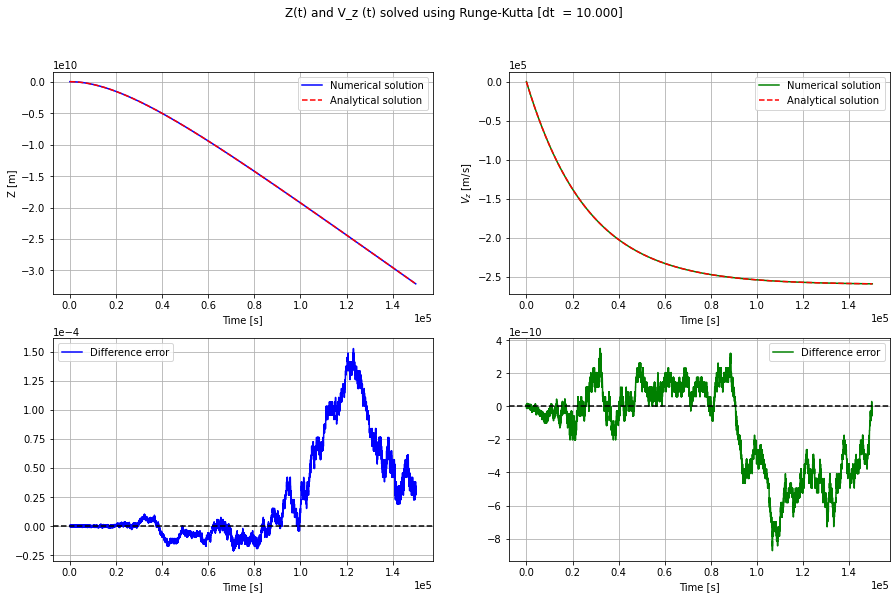

In [150]:
plt.figure(figsize=(15,9))
plt.suptitle("Z(t) and V_z (t) solved using Runge-Kutta [dt  = {:.3f}]  ".format(dt))
plt.subplot(2,2,1)
plt.plot(time,z_vals,c = "b",label="Numerical solution")
plt.plot(time,z_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("Z [m]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(time,v_vals, c="g",label="Numerical solution")
plt.plot(time,v_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("$V_z$ [m/s]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


plt.subplot(2,2,3)
plt.plot(time,E_z,c = "b",label="Difference error")

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,4)
plt.plot(time,E_v, c="g",label="Difference error")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


What is the terminal velocity $V_T$ ? 

Since: 

$$V_z(t) = -\frac{g}{K} \left( 1-e^{-Kt} \right)$$

$$V_z(t = \infty) = -\frac{g}{K}$$

In [151]:
last_n_data = 5
terminal_velocity = np.mean(v_vals[-last_n_data:])
print("The terminal velocity value obtained with the numerical algorithm is {:.3f} m/s".format(terminal_velocity))
print("The terminal velocity value obtained with the analytical solution is {:.3f} m/s".format(-g/K))
print("The percentual difference is {:.3f} %".format(100*(1-terminal_velocity/(-g/K))))

tau = np.log(2)/K
print("The coupling timescale tau is {:.3f} ".format(tau))

The terminal velocity value obtained with the numerical algorithm is -259042.094 m/s
The terminal velocity value obtained with the analytical solution is -259953.074 m/s
The percentual difference is 0.350 %
The coupling timescale tau is 18386.300 


What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

Since the velocity is $\frac{1}{2} V_T$ when $\left( 1-e^{-Kt} \right) = \frac{1}{2}$, this happens at: 

$$t_{V_T/2} = \tau = \frac{\ln (2)}{K} $$



Now try to integrate the motion with dt=0.5 $\tau$  ? What happen ?

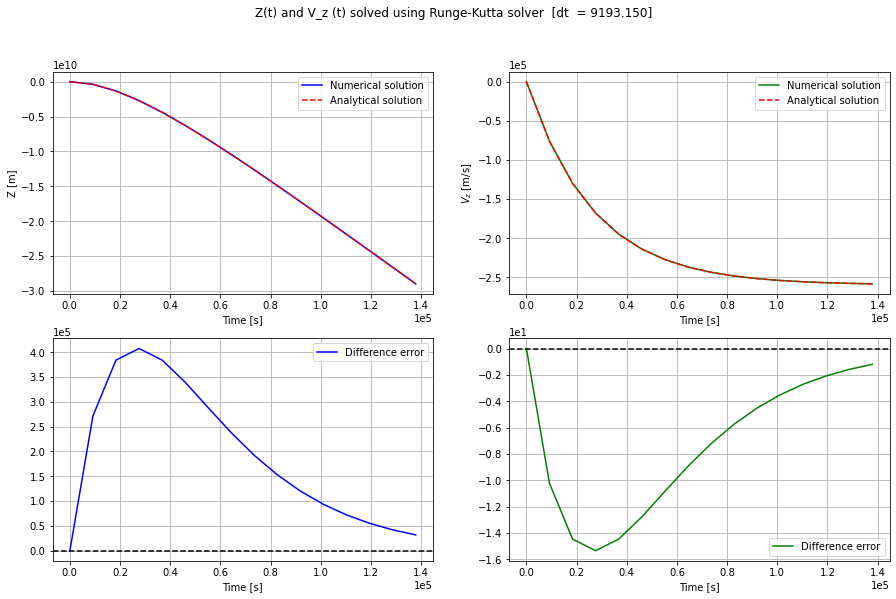

In [152]:
# simulation params
max_time = 1.5e5 #s 
dt = 0.5*tau #s 

#Generating DATA
time,phase_space = RK4_solver(dt,to,max_time,U)
z_vals = phase_space[:,0]
v_vals = phase_space[:,1]

# analytical solutions

z_an = real_solver_z(time,K)
v_an = real_solver_vz(time,K)

# difference
E_z = (z_an-z_vals)
E_v = (v_an-v_vals)


#PLOTTING
plt.figure(figsize=(15,9))
plt.suptitle("Z(t) and V_z (t) solved using Runge-Kutta solver  [dt  = {:.3f}]  ".format(dt))
plt.subplot(2,2,1)
plt.plot(time,z_vals,c = "b",label="Numerical solution")
plt.plot(time,z_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("Z [m]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(time,v_vals, c="g",label="Numerical solution")
plt.plot(time,v_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("$V_z$ [m/s]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


plt.subplot(2,2,3)
plt.plot(time,E_z,c = "b",label="Difference error")

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,4)
plt.plot(time,E_v, c="g",label="Difference error")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

#### ANSWER:
Using the implicit Euler solver method we got that:

$$Z_{n+1} = Z_{n} + V_{n+1}dt$$

$$V_{n+1} = Vz_{n} + F(V_{n+1}) dt$$

This, applied to the derivative function we got, and simplyfying the terms to get the step $n+1$, leads to:

$$Z_{n+1} = Z_{n} + V_{n+1}dt$$

$$V_{n+1} = V_{n} + (- K V_{n+1} -g )dt = \frac{V_n}{1+ K dt}-\frac{g}{1+ K dt} = \gamma \left( V_n - g dt\right)$$

with the constant:
$$ \gamma =\frac{1}{1+ K dt} $$

In [153]:
def implicit_Euler(to,dt,maxt,U,gamma):
    global g

    n_it = int((maxt-to)/dt) #number of iterations
    
    time = np.zeros(n_it) #time array
    ans = np.zeros([n_it,2]) # solitions array
    
    #initial values
    time[0] = to
    ans[0] = np.array(U)       

    for i in range(1,n_it):
        
        #previous conditions
        t = time[i-1]e
        v = ans[i-1].copy()
        
        #solvers
        v[1] = (v[1] - g*dt)/gamma #V
        v[0] = v[0] + v[1]*dt #Z
        
        #save new values
        ans[i] = v         
        time[i]= t+dt
        
    return (time,ans)

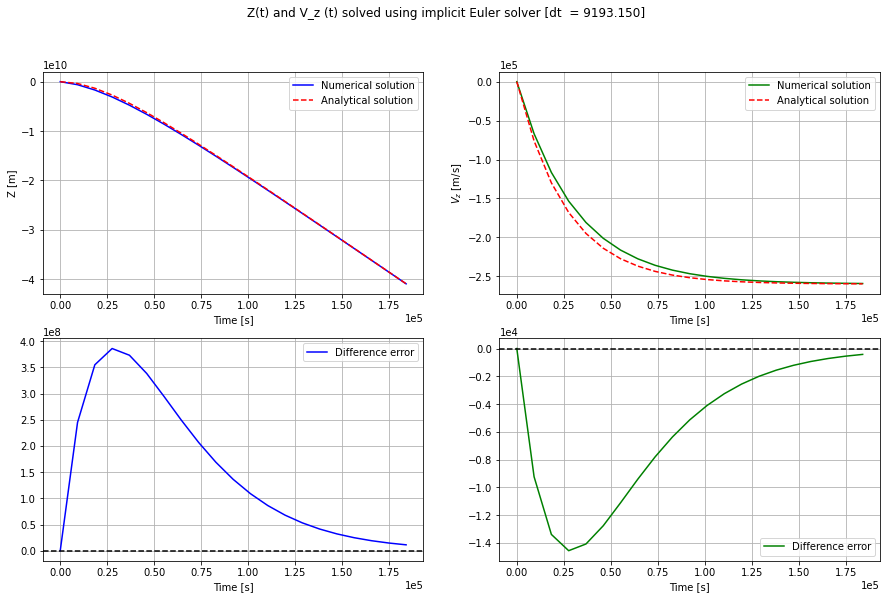

In [154]:
# Free fall vector and initial condtions
to = 0.0
Vo = 0.0
Zo = 0.0 # asuming the experiment beginsin t=0 at rest and z=0 as initial position
U = np.array([Zo,Vo]) 

#params
dt = 0.5*tau 
gamma = 1 + dt*K
max_time = 2 * 10e4


#Generating DATA
time,phase_space = implicit_Euler(to,dt,max_time,U,gamma)
z_vals = phase_space[:,0]
v_vals = phase_space[:,1]

# analytical solutions

z_an = real_solver_z(time,K)
v_an = real_solver_vz(time,K)

# difference
E_z = (z_an-z_vals)
E_v = (v_an-v_vals)


#PLOTTING


plt.figure(figsize=(15,9))
plt.suptitle("Z(t) and V_z (t) solved using implicit Euler solver [dt  = {:.3f}] ".format(dt))
plt.subplot(2,2,1)
plt.plot(time,z_vals,c = "b",label="Numerical solution")
plt.plot(time,z_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("Z [m]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(time,v_vals, c="g",label="Numerical solution")
plt.plot(time,v_an,c = "r", linestyle = "--",label="Analytical solution")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("$V_z$ [m/s]")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


plt.subplot(2,2,3)
plt.plot(time,E_z,c = "b",label="Difference error")

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2,2,4)
plt.plot(time,E_v, c="g",label="Difference error")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.axhline(0,c="k",linestyle="--")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()


Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


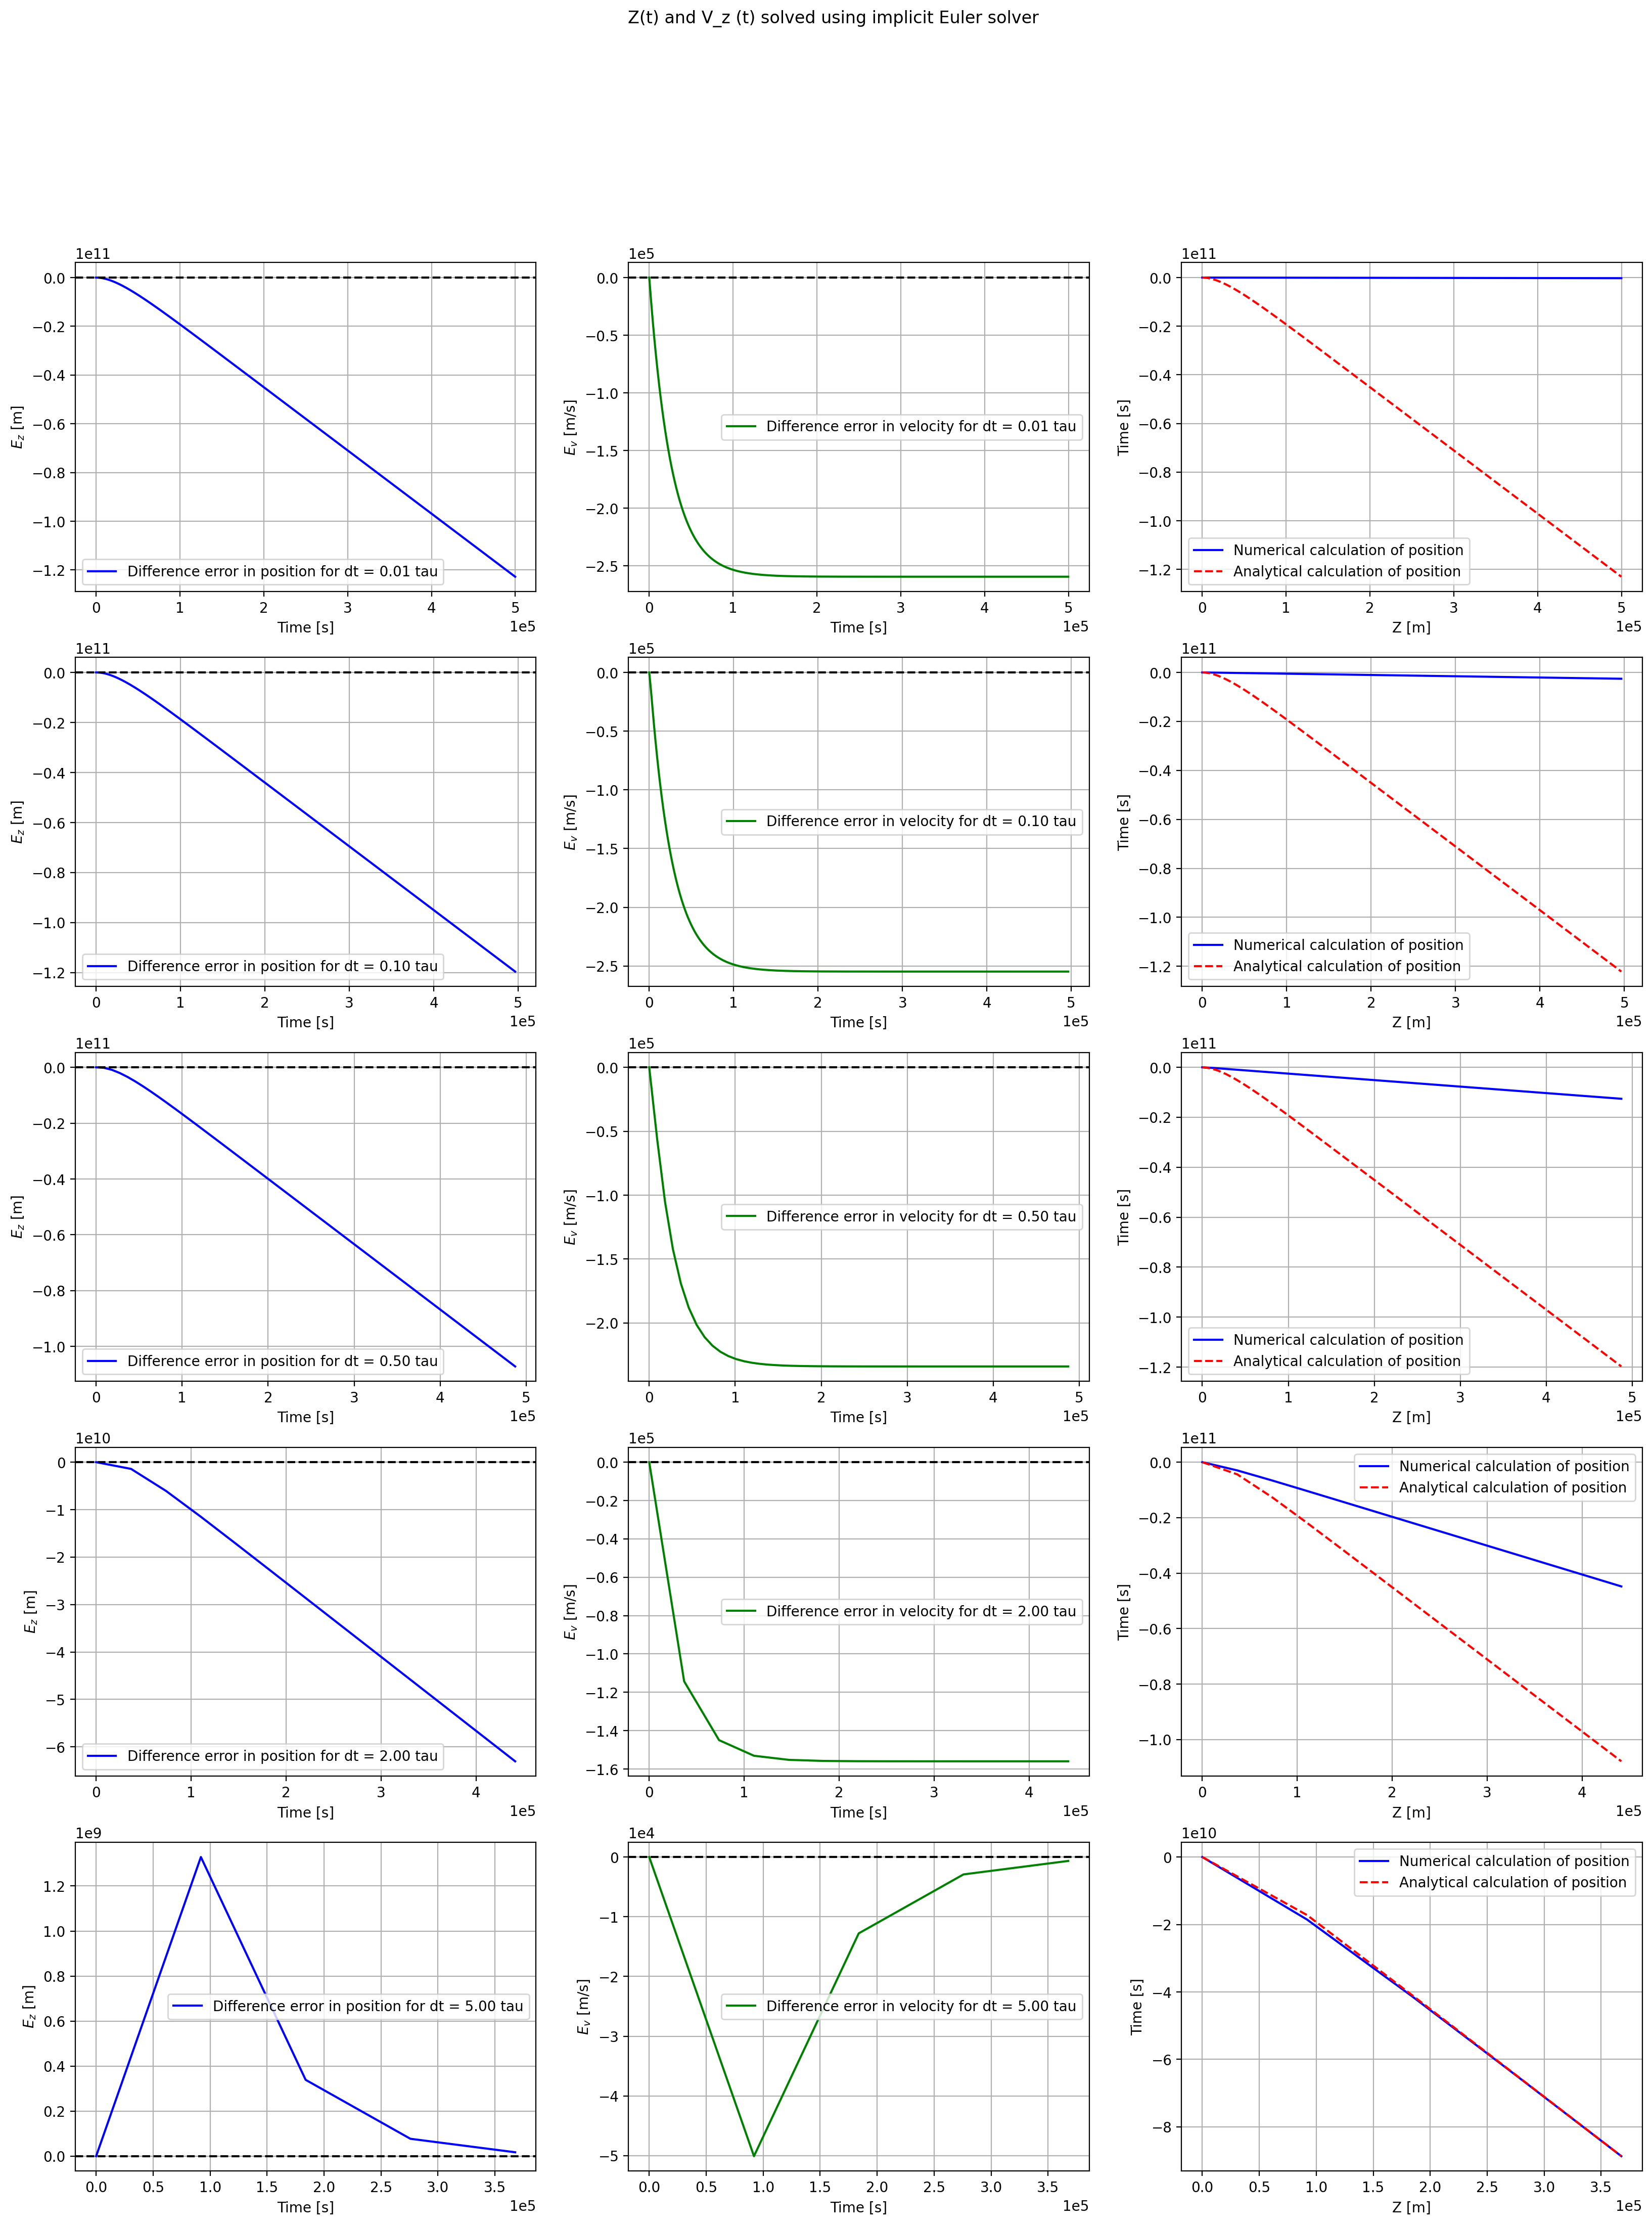

In [193]:
#params
gamma = 1 + dt*K
max_time = 5*10e4
# Free fall vector and initial condtions
to = 0.0
Vo = 0.0
Zo = 0.0 #  the experiment beginsin t=0 at rest and z=0 as initial position
U = np.array([Zo,Vo]) 

# dt sweep
dt_coeff = [0.01,0.1,0.5,2,5]



#PLOTTING

cm = "brg"
ss = 10 

plt.figure(figsize=(20,25),dpi=200)
plt.suptitle("Z(t) and V_z (t) solved using implicit Euler solver")
for i in range(len(dt_coeff)):
    
    dt = dt_coeff[i]*tau
    time,phase_space = implicit_Euler(to,dt,max_time,U,gamma)
    z_vals = phase_space[:,0]
    v_vals = phase_space[:,1]

    # analytical solutions

    z_an = real_solver_z(time,K)
    v_an = real_solver_vz(time,K)

    # difference
    E_z = (z_an-z_vals)
    E_v = (v_an-v_vals)

    
    
    
    
    
    plt.subplot(len(dt_coeff),3,3*i+1)
    plt.plot(time,E_z,c = "b",label="Difference error in position for dt = {:.2f} tau".format(dt_coeff[i]))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel("$E_z$ [m]")
    plt.xlabel("Time [s]")
    plt.axhline(0,c="k",linestyle="--")
    plt.grid()
    plt.legend()
    
    
    plt.subplot(len(dt_coeff),3,3*i+2)
    plt.plot(time,E_v,c = "g",label="Difference error in velocity for dt = {:.2f} tau".format(dt_coeff[i]))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel("$E_v$ [m/s]")
    plt.xlabel("Time [s]")
    plt.axhline(0,c="k",linestyle="--")
    plt.grid()
    plt.legend()


    plt.subplot(len(dt_coeff),3,3*i+3)
    plt.plot(time,z_vals,c="b",label="Numerical calculation of position")
    plt.plot(time,z_an,c="r",linestyle="--",label="Analytical calculation of position")
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlabel("Z [m]")
    plt.ylabel("Time [s]")
    plt.grid()
    plt.legend()







**Comment:** For big dt's the algorith seems to perform well, even better than for small ones.

THIS IS THE MAGIC OF IMPLICIT SOLVERS !